In [9]:
# Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Create a set of random latitudes and longitutde combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [12]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


-38.37445103218823 -164.58401992755034
-65.95356978810193 -65.47248317797485
-82.40949113988067 50.64864262315757
72.24149133593471 75.87238345343346
12.45712910255736 43.816747028536156
-75.16743472272152 38.670810447591066
51.07475329231096 -91.37876119339722
-65.9095605149868 10.104407713768325
31.259285912775397 -57.01454073671562
-10.194366902844862 -152.79134014339974
-60.15941717603107 -130.80296302665442
-67.40438266146387 -167.94012300117492
-11.9537949063172 103.8401224537908
-38.19916974287577 168.63433535828636
34.74257467821738 -158.07406510736993
88.72274310994266 -55.78138159906787
11.178425354271411 -168.08502074931835
-86.47262912520326 87.19386386364744
-51.82494516853654 44.04556635872882
-57.43713426320922 -83.37424474570395
-78.93790926368887 116.61162182018865
88.91984312008114 -110.88322332513678
-69.03658661457995 -140.58101063744667
71.33083955762115 -124.6494699245973
-66.13170848727466 -166.5399752339775
80.09176236193355 -35.37227817683004
83.89445579452274 

-54.11419272231151 -49.58133746158623
-5.072363380511391 -61.59297997453086
50.613055410702714 -127.56871183883243
24.688887669538616 -106.36316445534338
71.15693356998995 90.58861596020756
4.418368784393607 64.30091260998213
81.53731740984983 159.38718386349285
71.9326139508297 113.54519566890679
-20.66297525365188 -71.77747417266605
72.68485154842872 35.09786584702451
57.2612238519003 38.98367889389374
-6.043564590000315 131.8184982454802
-76.54908180090177 27.264322553489023
-79.71796559461013 138.36013901542458
87.33553123353462 -163.17341892523402
80.0822184885132 -168.58336269236912
-28.582858558683483 -15.70595531748458
84.65084929322552 64.4938059206535
82.60936480681477 -0.2290636869957723
40.136207594916556 133.50987579103958
-63.960558536668444 -169.67037552509018
-25.368398623767717 88.3821435107356
-87.36551336993134 -66.76401388532439
16.51705537812022 -11.099561201880647
-51.91506332447962 176.8624193779379
-52.91513089726196 -174.7139605464531
-32.99347990035595 -127.61

In [15]:
# Import the citipy module
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
# print(cities)
len(cities)



611

In [17]:
# Import the requests library
import requests

#Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | jibuti
Processing Record 6 of Set 1 | sioux lookout
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 1 | westport
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | tasiilaq
Proc

Processing Record 37 of Set 4 | dakar
Processing Record 38 of Set 4 | shadrinsk
Processing Record 39 of Set 4 | berezanka
Processing Record 40 of Set 4 | cauquenes
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | pafos
Processing Record 43 of Set 4 | zhezkazgan
Processing Record 44 of Set 4 | okhotsk
Processing Record 45 of Set 4 | tiarei
Processing Record 46 of Set 4 | guadalupe y calvo
Processing Record 47 of Set 4 | ploemeur
Processing Record 48 of Set 4 | yulara
Processing Record 49 of Set 4 | basco
Processing Record 50 of Set 4 | bluff
Processing Record 1 of Set 5 | sofiysk
City not found. Skipping...
Processing Record 2 of Set 5 | kuruman
Processing Record 3 of Set 5 | concepcion del uruguay
Processing Record 4 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 5 of Set 5 | lasa
Processing Record 6 of Set 5 | sisimiut
Processing Record 7 of Set 5 | afsin
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of Set 5 | pangnirtu

Processing Record 25 of Set 8 | tupik
Processing Record 26 of Set 8 | new haven
Processing Record 27 of Set 8 | quelimane
Processing Record 28 of Set 8 | port hedland
Processing Record 29 of Set 8 | tautira
Processing Record 30 of Set 8 | nyurba
Processing Record 31 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 32 of Set 8 | pouebo
Processing Record 33 of Set 8 | puerto escondido
Processing Record 34 of Set 8 | ribeira grande
Processing Record 35 of Set 8 | khovu-aksy
Processing Record 36 of Set 8 | angatuba
Processing Record 37 of Set 8 | oriximina
Processing Record 38 of Set 8 | katsuura
Processing Record 39 of Set 8 | vanimo
Processing Record 40 of Set 8 | quatre cocos
Processing Record 41 of Set 8 | pasichna
Processing Record 42 of Set 8 | erdenet
Processing Record 43 of Set 8 | price
Processing Record 44 of Set 8 | chagda
City not found. Skipping...
Processing Record 45 of Set 8 | hualmay
Processing Record 46 of Set 8 | riyadh
Processing Record 47

Processing Record 12 of Set 12 | nouakchott
Processing Record 13 of Set 12 | honiara
Processing Record 14 of Set 12 | tabou
Processing Record 15 of Set 12 | haibowan
City not found. Skipping...
Processing Record 16 of Set 12 | laguna
Processing Record 17 of Set 12 | fuyang
Processing Record 18 of Set 12 | saint-esteve
Processing Record 19 of Set 12 | nautla
Processing Record 20 of Set 12 | comodoro rivadavia
Processing Record 21 of Set 12 | morant bay
Processing Record 22 of Set 12 | weligama
Processing Record 23 of Set 12 | nizwa
Processing Record 24 of Set 12 | aksha
Processing Record 25 of Set 12 | damietta
Processing Record 26 of Set 12 | appingedam
Processing Record 27 of Set 12 | hasaki
Processing Record 28 of Set 12 | burgeo
Processing Record 29 of Set 12 | shimanovsk
Processing Record 30 of Set 12 | stilfontein
Processing Record 31 of Set 12 | donskoye
Processing Record 32 of Set 12 | mariental
Processing Record 33 of Set 12 | matamoros
Processing Record 34 of Set 12 | quimper


In [23]:
# Convery the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,69.85,83,6,3.44,CK,2022-08-10 16:15:07
1,Ushuaia,-54.8000,-68.3000,46.02,81,0,2.30,AR,2022-08-10 16:14:37
2,Port Alfred,-33.5906,26.8910,62.94,80,80,10.69,ZA,2022-08-10 16:12:57
3,Dikson,73.5069,80.5464,41.23,95,100,12.93,RU,2022-08-10 16:15:08
4,Jibuti,11.5000,42.5000,88.23,41,92,13.20,DJ,2022-08-10 16:15:08
5,Sioux Lookout,50.1001,-91.9170,66.79,40,2,12.03,CA,2022-08-10 16:15:09
6,Hermanus,-34.4187,19.2345,58.80,88,100,10.83,ZA,2022-08-10 16:15:09
7,Saint George,37.1041,-113.5841,88.43,49,0,4.61,US,2022-08-10 16:12:13
8,Faanui,-16.4833,-151.7500,75.78,74,0,4.05,PF,2022-08-10 16:15:10
9,Rikitea,-23.1203,-134.9692,73.09,79,99,24.90,PF,2022-08-10 16:15:10


In [24]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                   "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)




,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-08-10 16:15:07,-21.2078,-159.7750,69.85,83,6,3.44
1,Ushuaia,AR,2022-08-10 16:14:37,-54.8000,-68.3000,46.02,81,0,2.30
2,Port Alfred,ZA,2022-08-10 16:12:57,-33.5906,26.8910,62.94,80,80,10.69
3,Dikson,RU,2022-08-10 16:15:08,73.5069,80.5464,41.23,95,100,12.93
4,Jibuti,DJ,2022-08-10 16:15:08,11.5000,42.5000,88.23,41,92,13.20
5,Sioux Lookout,CA,2022-08-10 16:15:09,50.1001,-91.9170,66.79,40,2,12.03
6,Hermanus,ZA,2022-08-10 16:15:09,-34.4187,19.2345,58.80,88,100,10.83
7,Saint George,US,2022-08-10 16:12:13,37.1041,-113.5841,88.43,49,0,4.61
8,Faanui,PF,2022-08-10 16:15:10,-16.4833,-151.7500,75.78,74,0,4.05
9,Rikitea,PF,2022-08-10 16:15:10,-23.1203,-134.9692,73.09,79,99,24.90


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City ID")

In [26]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

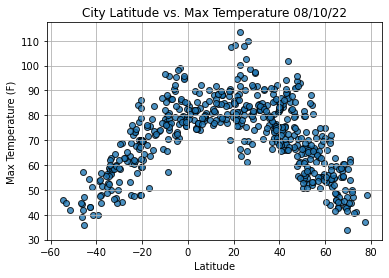

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

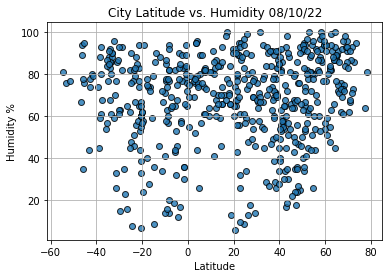

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

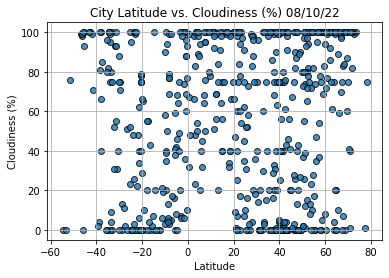

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

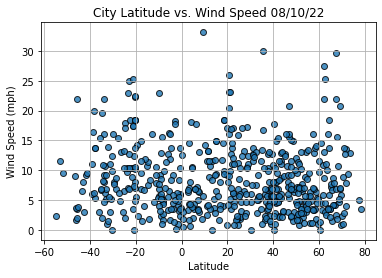

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [31]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Dikson,RU,2022-08-10 16:15:08,73.5069,80.5464,41.23,95,100,12.93
4,Jibuti,DJ,2022-08-10 16:15:08,11.5000,42.5000,88.23,41,92,13.20
5,Sioux Lookout,CA,2022-08-10 16:15:09,50.1001,-91.9170,66.79,40,2,12.03
7,Saint George,US,2022-08-10 16:12:13,37.1041,-113.5841,88.43,49,0,4.61
11,Westport,US,2022-08-10 16:11:34,41.1415,-73.3579,84.90,59,75,8.05


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

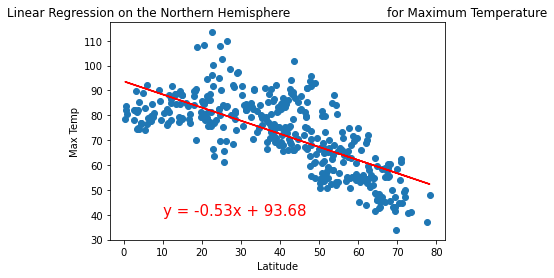

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

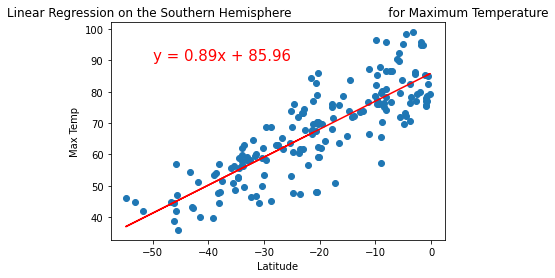

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

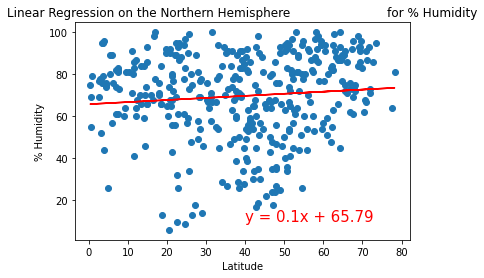

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

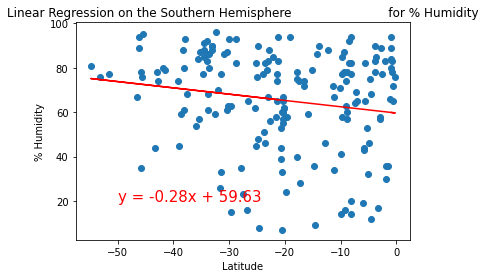

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

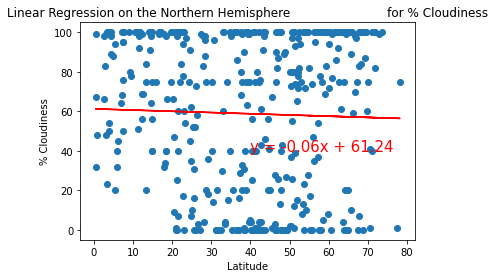

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,40))

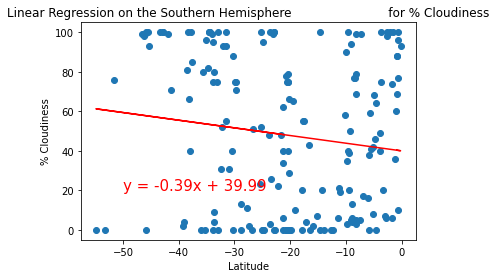

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

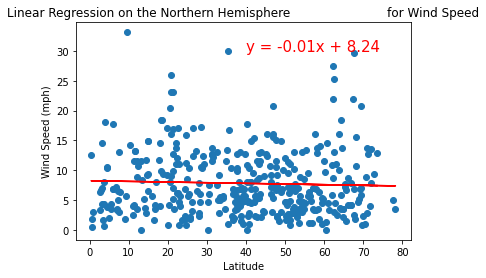

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,30))

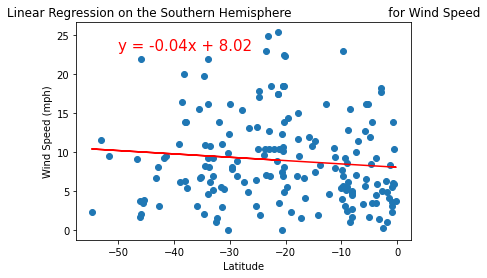

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,23))